
# Data assimilation (DA) & the ensemble Kalman filter (EnKF)
*Copyright (c) 2016, Patrick N. Raanes, NERSC*

### Jupyter notebooks
These tutorials are made in "Jupyter notebooks" which conveniently combine Python (code) with text (markdown). Notebooks live in the web browser because that's what its makers found convenient. A notebook consists of ***cells***, which you can work with using your mouse, or more efficiently, your keyboard:


| Navigate                      | Edit              | Exit           | Run    | Run and go to next      |
| -------------                 | : ------------- : | -------------  | : --- :| : ------------- :       |
| <kbd>↓</kbd> and <kbd>↑</kbd> | <kbd>Enter</kbd>  | <kbd>Esc</kbd> | <kbd>Ctrl</kbd>+<kbd>Enter</kbd> | <kbd>Shift</kbd>+<kbd>Ctrl</kbd>+<kbd>Enter</kbd> |


When you open a notebook it starts a session (kernel) of Python in the background. All of the Python code cells (in a given notebook) are connected -- they use the same Python kernel and thus share variables, functions, and classes. Thus, the order in which you run the cells matters. For example, the uppermost code cell in each of these tutorials will be the following, which you must run before any other code cells:


In [1]:
# Run this cell now.
from resources.workspace import *

Initializing DAPPER...Done


Another thing you must know is how to restart the Python session, which clears all of your variables, functions, etc, so that you can start over. Test this now by going through the top menu bar: `Kernel` → `Restart & Clear Output`. But rembember to run the above cell again!

### Data assimilation (DA) is:
<figure style="float:right;width:350px;">
    <img src="./resources/DA_bridges.jpg" alt='DA "bridges" data and models.'/>
    <figcaption>Data assimilation "bridges" data and models.<br>Attribution: Data Assimilation Research Team, <a href="http://www.aics.riken.jp">www.aics.riken.jp</a>.</figcaption>
</figure>
 * the calibration of big models with big data;
 * the fusion of forecasts with observations.
 
The problem of ***DA*** fits well within the math/stats theory of ***state estimation*** and ***sequential inference***. A concise theoretical overview of DA is given by Wikle and Berliner: [A Bayesian tutorial for data assimilation](http://web-static-aws.seas.harvard.edu/climate/pdf/2007/Wikle_Berliner_InPress.pdf)

Modern DA builds on state estimation techniques such as the ***Kalman filter (KF)***, which is an algorithm that recursively performs a form of least-squares regression. It was developed to steer the Apollo mission rockets to the moon, but also has applications outside of control systems, such as speech recognition, video tracking, and finance. An [introduction by pictures](http://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/) is provided by Tim Babb. An [interactive tutorial](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python) has been made by Roger Labbe.

When it was first proposed to apply the KF to DA (specifically, weather forecasting), the idea sounded ludicrous because of some severe **technical challenges in DA (vs. "classic" state estimation)**:
 * size of data and models;
 * nonlinearity of models;
 * sparsity and inhomogeneous-ness of data.

Some of these challenges may be recognized in the video below.

*Execute/run the cell below to bring up the video*

In [2]:
envisat_video()

### The EnKF is
an ensemble (Monte-Carlo) formulation of the KF
that manages (fairly well) to deal with the above challenges in DA.

For those familiar with the method of 4D-Var, **further advantages of the EnKF** include it being:
 * Non-invasive: the models are treated as black boxes, and no explicit jacobian is required.
 * Bayesian: 
   * provides ensemble of possible realities;
       - arguably the most practical form of "uncertainty quanitification";
       - ideal way to initialize "ensemble forecasts";
   * uses "flow-dependent" background covariances in the analysis.
 * Embarrasingly parallellizable:
   * distributed accross realizations for model forecasting;
   * distributed accross local domains for observation analysis.
   
The rest of this tutorial provides an EnKF-centric presentation of DA; it also has a [theoretical companion](./resources/DA_intro.pdf).

### DAPPER example
This tutorial builds on the underlying package, DAPPER, made for academic reserach in DA and its dissemination. For example, the code below is taken from  `DAPPER/example_1.py`. It illustrates DA on a small toy problem.

Run the cells in order and try to interpret the output.

<div class="alert alert-warning" role="alert">
<b>Don't worry</b> if you can't understand what's going on -- we will discuss it later throughout the tutorials. 
</div>


In [3]:
from mods.Lorenz63.sak12 import HMM
HMM.t.T = 30
# print(HMM)
xx,yy = simulate(HMM)

In [4]:
config = EnKF_N(N=4, store_u=True)
stats = config.assimilate(HMM,xx,yy)

In [5]:
avrgs = stats.average_in_time()
# print(avrgs)
print_averages(config,avrgs,[],['rmse_a','rmv_a'])

     |  rmse_a ±     rmv_a ±
---  -  ----------  -----------
[0]  |  0.6323 0.1  0.6095 0.03


Initializing liveplotting...
Hit <Space> to pause/step.
Hit <Enter> to resume/skip.


<IPython.core.display.Javascript object>


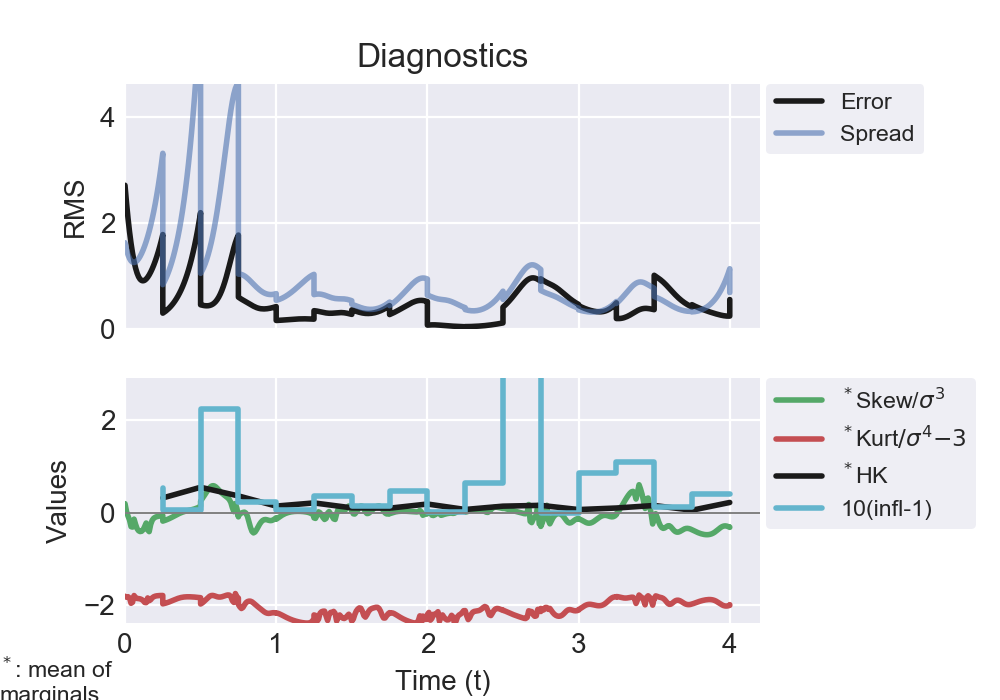

<IPython.core.display.Javascript object>


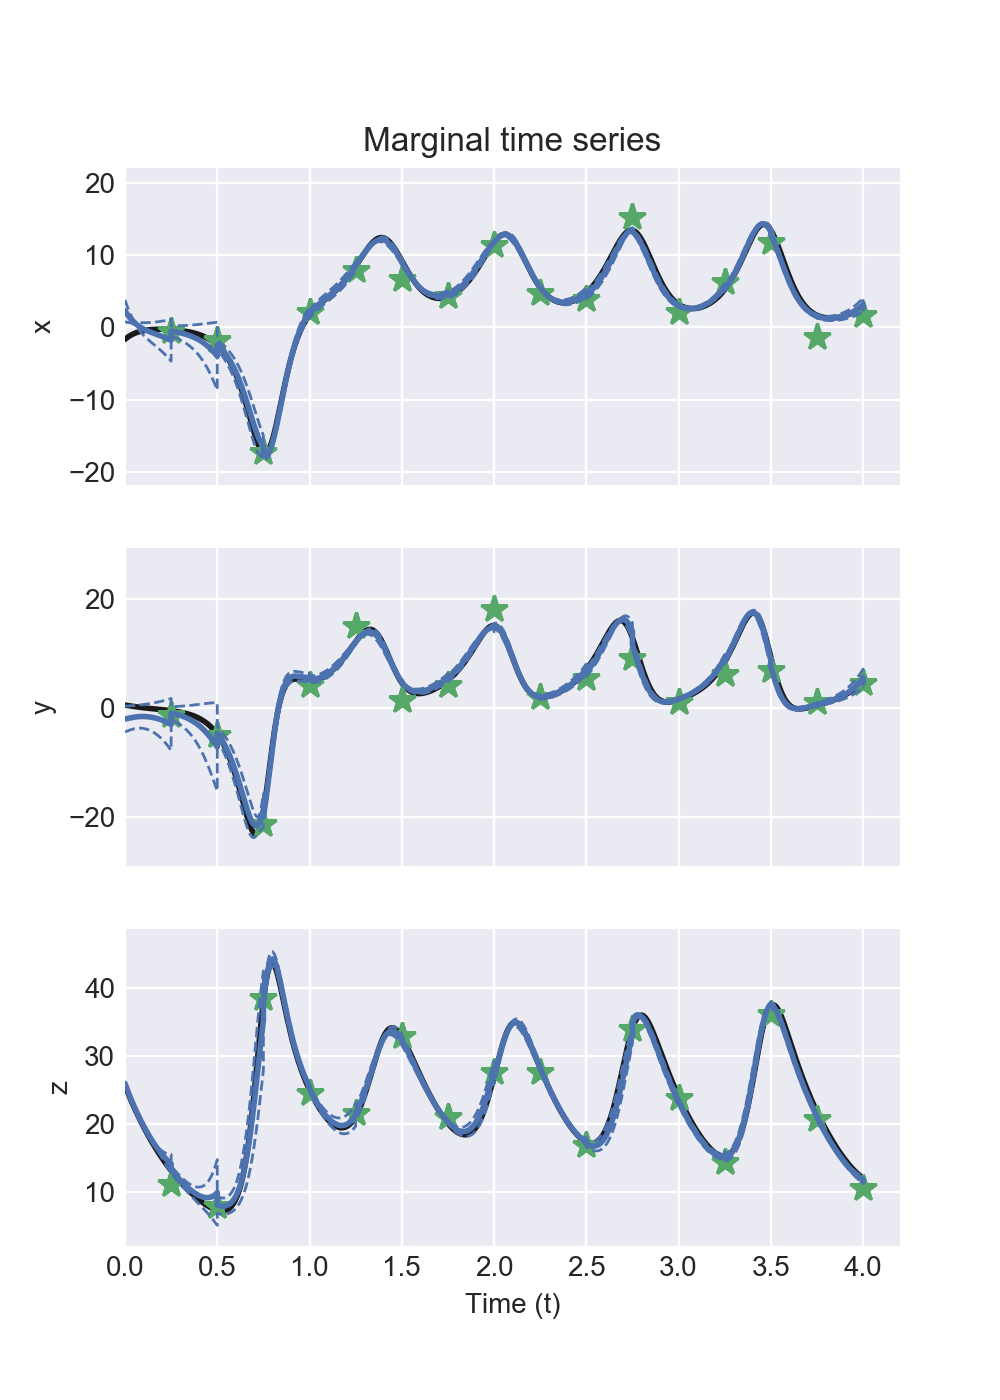

<IPython.core.display.Javascript object>


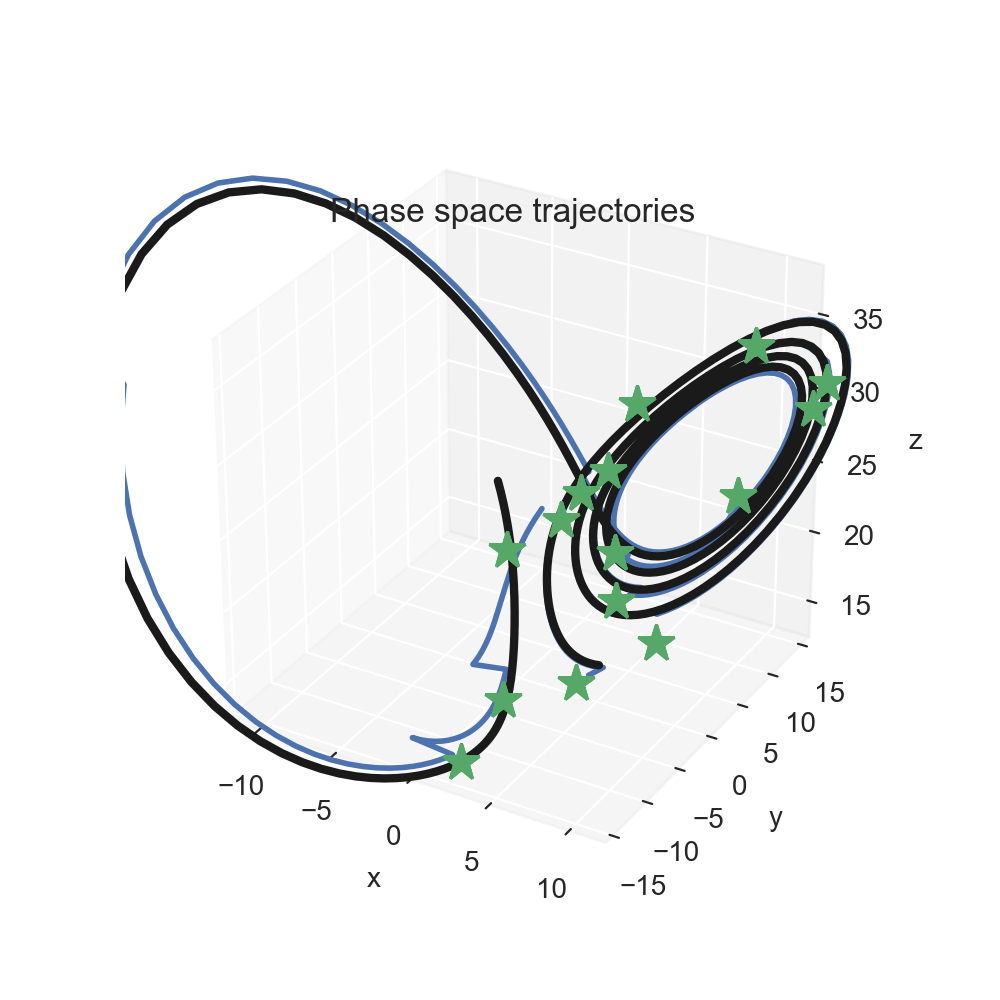

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [6]:
replay(stats)

### Exercises

**Exc 1.2:** Word association.
Fill in the `X`'s in the table to group the words according to meaning.

`Filtering, Sample, Random, Measurements, Kalman filter (KF), Monte-Carlo, Observations, Set of draws, State estimation, Data fusion`

---
`Data Assimilation (DA)     Ensemble      Stochastic     Data        
X                          X             X              X           
X                          X             X              X           
X                          
X`

In [7]:
#show_answer('thesaurus 1')


* "The answer" is given from the perspective of DA. Do you agree with it?
* Can you describe the (important!) nuances between the similar words?

---
<em>Exercises marked with an asterisk (*) are optional.</em>

**Exc 1.3*:** Word association (advanced).
Group these words:

`Inverse problems, Sample point, Probability, Particle, Sequential, Inversion, Realization, Relative frequency, Iterative, Estimation, Single draw, Serial, Approximation, Regression, Fitting`

---

`Statistical inference    Ensemble member     Quantitative belief    Recursive 
X                        X                   X                      X         
X                        X                   X                      X         
X                        X                                          X         
X                        X
X                        
X                        
`
          



In [8]:
show_answer('thesaurus 2')

### Next: [Bayesian inference](T2 - Bayesian inference.ipynb)